<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_114/blob/main/Proyecto_Final_Entrega2_(Reto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
# Alumnos:
# Javier Granados - A00566717
# Josías Ruiz - A00968460
# Profesor:
# María de la Paz Rico Fernández
# Entrega:
# Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans
# Fecha:
# 16/11/2022

In [198]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
import pandas as pd
import numpy as np
import io
import requests
import urllib.request
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

pd.set_option('display.max_columns', None)

In [200]:
url1 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
url2 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'

In [201]:
df_sub = pd.read_csv(url1, encoding_errors='ignore', error_bad_lines=False)
df_sup = pd.read_csv(url2, encoding_errors='ignore', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


# Mapeao de Indicadores de calidad

In [202]:
print(df_sub['CALIDAD_COLI_FEC'].isna().sum())
print(df_sub['CALIDAD_COLI_FEC'].unique())
df_sub['CALIDAD_COLI_FEC'].replace({
    'Potable - Excelente':10,
    'Buena calidad':1,
    'Aceptable':0,
    'Contaminada':-1,
    'Fuertemente contaminada':-10
}, inplace=True)

0
['Potable - Excelente' 'Aceptable' 'Contaminada' 'Buena calidad'
 'Fuertemente contaminada']


In [203]:
print(df_sub['CALIDAD_SDT_ra'].isna().sum())
print(df_sub['CALIDAD_SDT_ra'].unique())
df_sub['CALIDAD_SDT_ra'].fillna(df_sub['CALIDAD_SDT_ra'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_SDT_ra'].replace({
    'Excelente para riego':10,
    'Cultivos sensibles':1,
    'Cultivos con manejo especial':1,
    'Cultivos tolerantes':0,
    'Indeseable para riego':-1
}, inplace=True)

2
['Cultivos sensibles' 'Excelente para riego'
 'Cultivos con manejo especial' 'Cultivos tolerantes'
 'Indeseable para riego' nan]


In [204]:
print(df_sub['CALIDAD_SDT_salin'].isna().sum())
print(df_sub['CALIDAD_SDT_salin'].unique())
df_sub['CALIDAD_SDT_salin'].fillna(df_sub['CALIDAD_SDT_salin'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_SDT_salin'].replace({
    'Potable - Dulce':10,
    'Ligeramente salobres':0,
    'Salobres':0,
    'Salinas':-1
}, inplace=True)

2
['Potable - Dulce' 'Ligeramente salobres' 'Salobres' 'Salinas' nan]


In [205]:
print(df_sub['CALIDAD_CR'].isna().sum())
print(df_sub['CALIDAD_CR'].unique())
df_sub['CALIDAD_CR'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-10
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [206]:
print(df_sub['CALIDAD_CONDUC'].isna().sum())
print(df_sub['CALIDAD_CONDUC'].unique())
df_sub['CALIDAD_CONDUC'].fillna(df_sub['CALIDAD_CONDUC'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_CONDUC'].replace({
    'Permisible para riego':0,
    'Buena para riego':1,
    'Excelente para riego':10,
    'Dudosa para riego':-1,
    'Indeseable para riego':-10
},inplace=True)

6
['Permisible para riego' 'Buena para riego' 'Dudosa para riego'
 'Indeseable para riego' nan 'Excelente para riego']


In [207]:
print(df_sub['CALIDAD_CD'].isna().sum())
print(df_sub['CALIDAD_CD'].unique())
df_sub['CALIDAD_CD'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-10
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [208]:
print(df_sub['CALIDAD_AS'].isna().sum())
print(df_sub['CALIDAD_AS'].unique())
df_sub['CALIDAD_AS'].replace({
    'Apta como FAAP':0,
    'No apta como FAAP':-10,
    'Potable - Excelente':10,
}, inplace=True)

0
['Apta como FAAP' 'No apta como FAAP' 'Potable - Excelente']


In [209]:
print(df_sub['CALIDAD_ALC'].isna().sum())
print(df_sub['CALIDAD_ALC'].unique())
df_sub['CALIDAD_ALC'].fillna(df_sub['CALIDAD_ALC'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_ALC'].replace({
    'Alta':10,
    'Media':0,
    'Baja':-1,
    'Indeseable como FAAP':-10,
}, inplace=True)

4
['Alta' 'Media' 'Baja' 'Indeseable como FAAP' nan]


In [210]:
print(df_sub['CALIDAD_PB'].isna().sum())
print(df_sub['CALIDAD_PB'].unique())
df_sub['CALIDAD_PB'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-10,
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [211]:
print(df_sub['CALIDAD_N_NO3'].isna().sum())
print(df_sub['CALIDAD_N_NO3'].unique())
df_sub['CALIDAD_N_NO3'].fillna(df_sub['CALIDAD_N_NO3'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_N_NO3'].replace({
    'Potable - Excelente':10,
    'Potable - Buena calidad':0,
    'No apta como FAAP':-10,
}, inplace=True)


1
['Potable - Excelente' 'Potable - Buena calidad' 'No apta como FAAP' nan]


In [212]:
print(df_sub['CALIDAD_MN'].isna().sum())
print(df_sub['CALIDAD_MN'].unique())
df_sub['CALIDAD_MN'].replace({
    'Potable - Excelente':10,
    'Puede afectar la salud':-10,
    'Sin efectos en la salud - Puede dar color al agua':-1,
}, inplace=True)

0
['Potable - Excelente' 'Puede afectar la salud'
 'Sin efectos en la salud - Puede dar color al agua']


In [213]:
print(df_sub['CALIDAD_HG'].isna().sum())
print(df_sub['CALIDAD_HG'].unique())
df_sub['CALIDAD_HG'].replace({
    'Potable - Excelente':10,
    'No apta como FAAP':-10,
}, inplace=True)

0
['Potable - Excelente' 'No apta como FAAP']


In [214]:
print(df_sub['CALIDAD_FLUO'].isna().sum())
print(df_sub['CALIDAD_FLUO'].unique())
df_sub['CALIDAD_FLUO'].replace({
    'Potable - Optima':10,
    'Alta':1,
    'Baja':-10,
    'Media':0,
}, inplace=True)

0
['Potable - Optima' 'Alta' 'Baja' 'Media']


In [215]:
print(df_sub['CALIDAD_FE'].isna().sum())
print(df_sub['CALIDAD_FE'].unique())
df_sub['CALIDAD_FE'].replace({
    'Potable - Excelente':10,
    'Sin efectos en la salud - Puede dar color al agua':-1,
}, inplace=True)

0
['Potable - Excelente' 'Sin efectos en la salud - Puede dar color al agua']


In [216]:
print(df_sub['CALIDAD_DUR'].isna().sum())
print(df_sub['CALIDAD_DUR'].unique())
df_sub['CALIDAD_DUR'].fillna(df_sub['CALIDAD_DUR'].mode().iloc[0], inplace=True)
df_sub['CALIDAD_DUR'].replace({
    'Potable - Dura':0,
    'Muy dura e indeseable usos industrial y domestico':-10,
    'Potable - Suave':10,
    'Potable - Moderadamente suave':1,
}, inplace=True)

1
['Potable - Dura' 'Muy dura e indeseable usos industrial y domestico'
 'Potable - Suave' 'Potable - Moderadamente suave' nan]


In [217]:
conservarCols = ['ESTADO',
 'LATITUD',
 'LONGITUD',
 'MUNICIPIO',
 'CALIDAD_COLI_FEC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_CR',
 'CALIDAD_CONDUC',
 'CALIDAD_CD',
 'CALIDAD_AS',
 'CALIDAD_ALC',
 'CALIDAD_PB',
 'CALIDAD_N_NO3',
 'CALIDAD_MN',
 'CALIDAD_HG',
 'CALIDAD_FLUO',
 'CALIDAD_FE',
 'CALIDAD_DUR'
 ]

removerCols = [x for x in df_sub.columns if x not in conservarCols]

In [218]:
# Remover columnas qeu no utilizaremos
df_sub.drop(columns=removerCols, inplace=True)

In [219]:
indicadoresCalidad = ['CALIDAD_ALC',
                      'CALIDAD_CONDUC',
                      'CALIDAD_SDT_ra',
                      'CALIDAD_SDT_salin',
                      'CALIDAD_FLUO',
                      'CALIDAD_DUR',
                      'CALIDAD_COLI_FEC',
                      'CALIDAD_N_NO3',
                      'CALIDAD_AS',
                      'CALIDAD_CD',
                      'CALIDAD_CR',
                      'CALIDAD_HG',
                      'CALIDAD_PB' ,
                      'CALIDAD_MN',
                      'CALIDAD_FE']

In [220]:
df_sub['SemaforoCalidad'] = df_sub[indicadoresCalidad].sum(axis=1)

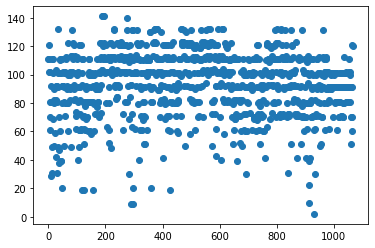

In [221]:
plt.scatter(df_sub.index, df_sub['SemaforoCalidad'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f086e69f050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f086e69f8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f086e6fdd50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f086e68eed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f086e8d2210>],
 'means': []}

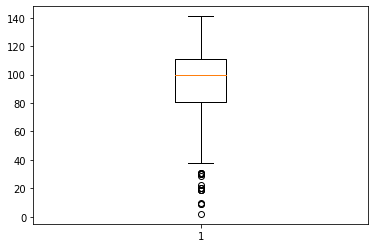

In [222]:
plt.boxplot(df_sub['SemaforoCalidad'])

In [223]:
df_sub['SemaforoCalidad'].describe()

count    1068.000000
mean       94.015918
std        22.271999
min         2.000000
25%        81.000000
50%       100.000000
75%       111.000000
max       141.000000
Name: SemaforoCalidad, dtype: float64

In [224]:
df_sub

,ESTADO,MUNICIPIO,LONGITUD,LATITUD,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SemaforoCalidad
0,AGUASCALIENTES,ASIENTOS,-102.02210,22.20887,10,0,1,10,10,0,10,10,0,10,10,10,10,10,10,111
1,AGUASCALIENTES,AGUASCALIENTES,-102.20075,21.99958,10,1,10,10,10,0,10,0,0,10,10,10,10,10,10,111
2,AGUASCALIENTES,COSIO,-102.28801,22.36685,10,1,10,10,1,0,10,10,-10,10,10,10,10,10,10,102
3,AGUASCALIENTES,RINCON DE ROMOS,-102.29449,22.18435,10,1,10,10,10,0,10,10,0,10,10,10,10,10,10,121
4,BAJA CALIFORNIA SUR,LA PAZ,-110.24480,23.45138,10,0,1,0,-10,0,0,-10,10,10,10,10,10,10,10,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,NUEVO LEON,LINARES,-99.54191,24.76036,10,-1,1,0,-10,-10,10,-10,10,10,10,10,10,10,10,60
1064,NUEVO LEON,LINARES,-99.70099,24.78280,10,1,10,10,-10,0,10,-10,10,10,10,10,10,10,10,91
1065,NUEVO LEON,CADEREYTA JIMENEZ,-99.82249,25.55197,10,-1,1,0,10,-10,0,-10,10,10,10,10,10,10,10,70
1066,NUEVO LEON,GALEANA,-100.32683,24.80118,10,0,1,10,10,0,10,10,10,10,10,10,10,10,10,121


In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier

In [243]:
# Split data
X = df_sub.iloc[:,4:-1]
y = df_sub.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [244]:
X

,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
0,10,0,1,10,10,0,10,10,0,10,10,10,10,10,10
1,10,1,10,10,10,0,10,0,0,10,10,10,10,10,10
2,10,1,10,10,1,0,10,10,-10,10,10,10,10,10,10
3,10,1,10,10,10,0,10,10,0,10,10,10,10,10,10
4,10,0,1,0,-10,0,0,-10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,10,-1,1,0,-10,-10,10,-10,10,10,10,10,10,10,10
1064,10,1,10,10,-10,0,10,-10,10,10,10,10,10,10,10
1065,10,-1,1,0,10,-10,0,-10,10,10,10,10,10,10,10
1066,10,0,1,10,10,0,10,10,10,10,10,10,10,10,10


In [227]:
classifierRF = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, n_jobs=-1)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=15, n_estimators=500, n_jobs=-1)

# Feature Importance

In [251]:
featureImportances = {}
for name, score in zip(df_sub.columns[4:-1], classifierRF.feature_importances_):
  featureImportances[name] = score
  print('{0:20s} -> {1:6.3f}'.format(name, score*100))

CALIDAD_ALC          ->  9.154
CALIDAD_CONDUC       ->  5.576
CALIDAD_SDT_ra       ->  4.742
CALIDAD_SDT_salin    -> 10.454
CALIDAD_FLUO         ->  9.113
CALIDAD_DUR          ->  5.813
CALIDAD_COLI_FEC     -> 13.385
CALIDAD_N_NO3        -> 12.976
CALIDAD_AS           ->  9.892
CALIDAD_CD           ->  6.787
CALIDAD_CR           ->  5.264
CALIDAD_HG           ->  0.017
CALIDAD_PB           ->  0.273
CALIDAD_MN           ->  0.000
CALIDAD_FE           ->  0.150


In [252]:
_ = pd.DataFrame(featureImportances, index=[0]).T
_

,0
CALIDAD_ALC,0.091540
CALIDAD_CONDUC,0.055758
CALIDAD_SDT_ra,0.047416
CALIDAD_SDT_salin,0.104544
CALIDAD_FLUO,0.091127
CALIDAD_DUR,0.058131
CALIDAD_COLI_FEC,0.133846
CALIDAD_N_NO3,0.129759
CALIDAD_AS,0.098923
CALIDAD_CD,0.067874


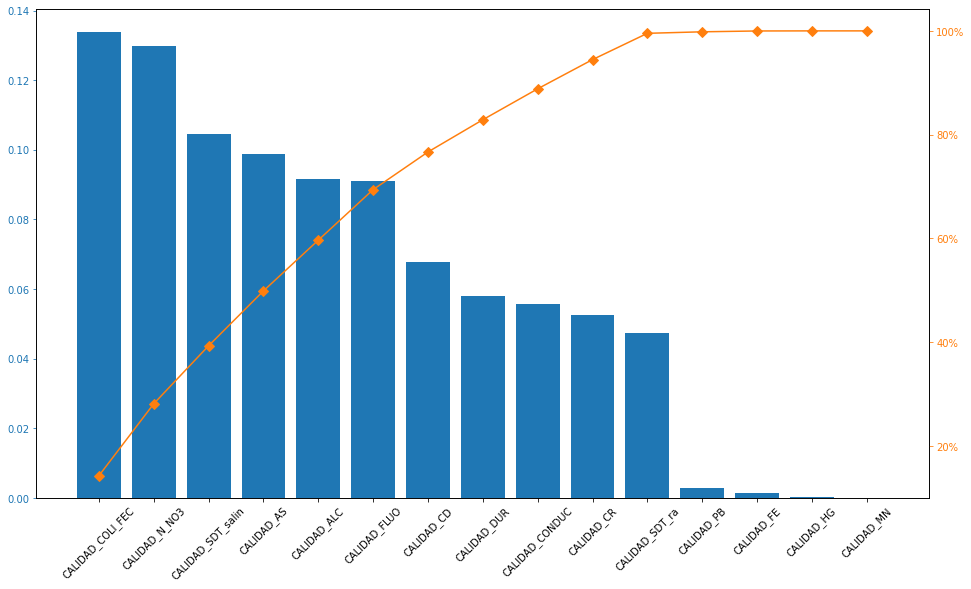

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

_.rename(columns={0:'Importancia'}, inplace=True)
_ = _.sort_values(by='Importancia',ascending=False)
_["Importancia_porcentaje"] = _["Importancia"].cumsum()/_["Importancia"].sum()*100


fig, ax = plt.subplots(figsize=(16,9))
ax.bar(_.index, _["Importancia"], color="C0")
ax2 = ax.twinx()
ax2.plot(_.index, _["Importancia_porcentaje"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xticklabels(_.index, rotation = 45)
plt.show()


In [254]:
# nos quedamos sólo con 11 de 15 propiedades
mostImportantFeatures = ['CALIDAD_CONDUC',
                         'CALIDAD_FLUO',
                         'CALIDAD_DUR',
                         'CALIDAD_N_NO3',
                         'CALIDAD_FE',
                         'CALIDAD_ALC',
                         'CALIDAD_MN',
                         'CALIDAD_COLI_FEC',
                         'CALIDAD_SDT_ra',
                         'CALIDAD_SDT_salin',
                         'CALIDAD_AS'
]

In [255]:
# Split de información con los features más importantes
df_sub2 = df_sub[mostImportantFeatures+['SemaforoCalidad']]
X = df_sub2.iloc[:,:-1]
y = df_sub2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
pipeline = Pipeline(steps=[
    ('rf', classifierRF),
])
delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [256]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, titulo, etiquetaX, etiquetaY):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(titulo)
    plt.xlabel(etiquetaX)
    plt.ylabel(etiquetaY)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()


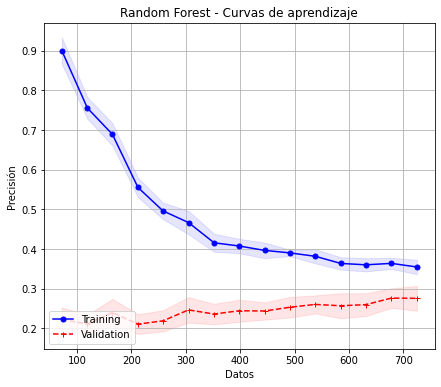

In [257]:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'Random Forest - Curvas de aprendizaje', 'Datos', 'Precisión')

In [258]:
delta_train_sz

array([0.1       , 0.16428571, 0.22857143, 0.29285714, 0.35714286,
       0.42142857, 0.48571429, 0.55      , 0.61428571, 0.67857143,
       0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.        ])

In [259]:
classifierDT = DecisionTreeClassifier(max_leaf_nodes=15)
pipeline2 = Pipeline(steps=[
    ('dt', classifierDT),
])
delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline2,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


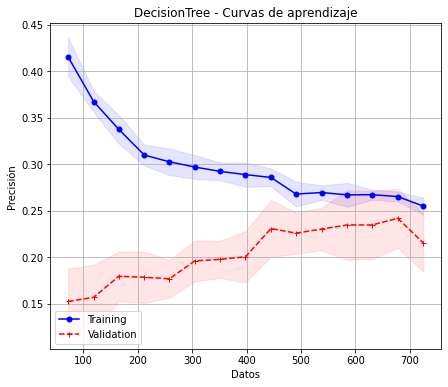

In [260]:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'DecisionTree - Curvas de aprendizaje', 'Datos', 'Precisión')